In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from test_model import test_model
from sklearn.metrics import confusion_matrix
from sc_sharp import scSHARP
import utilities

/home/users/lewinsda/.conda/envs/daniel_thesis_2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
grid_results = pd.read_csv("grid_search_sim_0.7_output/combined.csv", header=None, index_col=0)
grid_results.columns = ["Total Accuracy", "Val Accuracy", "Test Accuracy", "Total SD", "Val SD", "Test SD", "Config", "Dropout", "Batch", "Neighbors"]
grid_results['GCN Layers'] = grid_results['Config'].apply(lambda x: x.split('_')[0])
grid_results['Final Embedding'] = grid_results['Config'].apply(lambda x: x.split('_')[1].split(".")[0])
grid_results['GCN Layers'] = pd.to_numeric(grid_results['GCN Layers'])
grid_results['Final Embedding'] = pd.to_numeric(grid_results['Final Embedding'])
grid_results.sort_values("Val Accuracy", ascending=False).head(10)

,Total Accuracy,Val Accuracy,Test Accuracy,Total SD,Val SD,Test SD,Config,Dropout,Batch,Neighbors,GCN Layers,Final Embedding
0,,,,,,,,,,,,
1,0.824950,0.888690,0.0,0.001254,0.007450,0.0,2_25.txt,0.0,20,2,2,25
127,0.824248,0.884524,0.0,0.001176,0.006987,0.0,2_15.txt,0.0,20,2,2,15
91,0.824148,0.883929,0.0,0.001783,0.010592,0.0,2_40.txt,0.0,20,2,2,40
151,0.823547,0.880357,0.0,0.003254,0.019329,0.0,2_60.txt,0.0,50,2,2,60
46,0.823146,0.877976,0.0,0.003247,0.019288,0.0,3_60.txt,0.0,65,2,3,60
133,0.823046,0.877381,0.0,0.003211,0.019072,0.0,2_15.txt,0.0,50,2,2,15
136,0.822745,0.875595,0.0,0.002238,0.013295,0.0,2_15.txt,0.0,65,2,2,15
130,0.822445,0.873810,0.0,0.002786,0.016553,0.0,2_15.txt,0.0,35,2,2,15
97,0.822345,0.873214,0.0,0.003342,0.019851,0.0,2_40.txt,0.0,50,2,2,40


In [19]:
set(range(1,217))-set(grid_results.index.to_numpy())

set()

<AxesSubplot:xlabel='Batch', ylabel='Val Accuracy'>

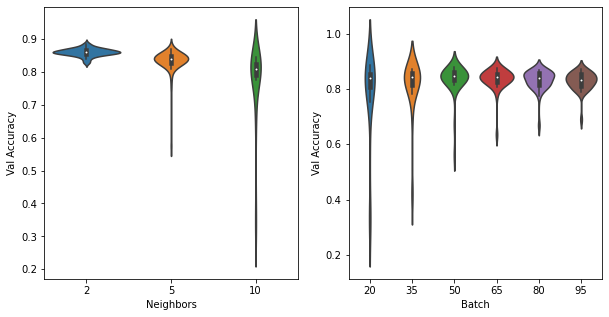

In [3]:
fig, axs = plt.subplots(1,2, figsize=(10, 5))
sns.violinplot(x=grid_results["Neighbors"], y=grid_results["Val Accuracy"], ax = axs[0])
sns.violinplot(x=grid_results["Batch"], y=grid_results["Val Accuracy"], ax = axs[1])

<AxesSubplot:xlabel='Final Embedding', ylabel='Val Accuracy'>

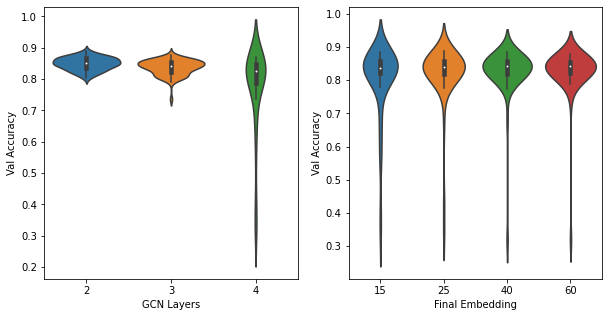

In [4]:
fig, axs = plt.subplots(1,2,figsize=(10, 5))
sns.violinplot(x=grid_results["GCN Layers"], y=grid_results["Val Accuracy"], ax = axs[0])
sns.violinplot(x=grid_results["Final Embedding"], y=grid_results["Val Accuracy"], ax = axs[1])

In [5]:
data_folders = ["/home/groups/ConradLab/daniel/sharp_data/sharp_sims_test/splat_0.7_de_rq/"]
tools = ["sctype","scsorter","scina", "singler", "scpred"]
votes_necessary = .51
model_file = "configs/2_25.txt"
neighbors = 2
batch_size=20
training_epochs=150
random_inits = 5
counts="query_counts.csv"
meta="query_meta.csv"
meta_col = "Group"

In [6]:
results = test_model(data_folders, tools, votes_necessary, model_file, neighbors, batch_size, training_epochs, random_inits, counts=counts, meta=meta, meta_col=meta_col)
results

Loss in epoch 0 = 57.785511
Loss in epoch 10 = 0.098378
Loss in epoch 20 = 0.024293
Loss in epoch 30 = 0.007852
Loss in epoch 40 = 0.004903
Loss in epoch 50 = 0.002958
Loss in epoch 60 = 0.001571
Loss in epoch 70 = 0.001031
Loss in epoch 80 = 0.000970
Loss in epoch 90 = 0.000622
Loss in epoch 100 = 0.000404
Loss in epoch 110 = 0.000375
Loss in epoch 120 = 0.000243
Loss in epoch 130 = 0.000169
Loss in epoch 140 = 0.000132
Loss in epoch 0 = 59.127613
Loss in epoch 10 = 0.118127
Loss in epoch 20 = 0.025608
Loss in epoch 30 = 0.010388
Loss in epoch 40 = 0.005081
Loss in epoch 50 = 0.003174
Loss in epoch 60 = 0.001448
Loss in epoch 70 = 0.001186
Loss in epoch 80 = 0.000806
Loss in epoch 90 = 0.000599
Loss in epoch 100 = 0.000488
Loss in epoch 110 = 0.000269
Loss in epoch 120 = 0.000259
Loss in epoch 130 = 0.000162
Loss in epoch 140 = 0.000100
Loss in epoch 0 = 60.667618
Loss in epoch 10 = 0.099394
Loss in epoch 20 = 0.022345
Loss in epoch 30 = 0.008613
Loss in epoch 40 = 0.004093
Loss in ep

/home/users/lewinsda/scSHARP/utilities.py:185: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return float((torch.tensor(preds) == torch.tensor(real)).type(torch.FloatTensor).mean().numpy())


,data_name,method,total_accuracy,train_accuracy,test_accuracy,total_sd,train_sd,test_sd
0,splat_0.7_de_rq,GCN,0.899800,0.944181,0.660256,0.006054,0.000000,0.038728
1,splat_0.7_de_rq,Max Col.,0.863727,0.944181,0.429487,0.000000,0.000000,0.000000
2,splat_0.7_de_rq,Confident Labels,NaN,0.944181,NaN,0.000000,0.000000,0.000000
3,splat_0.7_de_rq,sctype,0.648297,0.743468,0.134615,0.000000,0.000000,0.000000
4,splat_0.7_de_rq,scsorter,0.857715,0.921615,0.512821,0.000000,0.000000,0.000000
5,splat_0.7_de_rq,scina,0.537074,0.622328,0.076923,0.000000,0.000000,0.000000
6,splat_0.7_de_rq,singler,0.830661,0.836105,0.801282,0.000000,0.000000,0.000000
7,splat_0.7_de_rq,scpred,0.592184,0.678147,0.128205,0.000000,0.000000,0.000000
8,splat_0.7_de_rq,Tool Avg.,0.693186,0.760333,0.330769,0.143663,0.120247,0.315623


(0.0, 1.0)

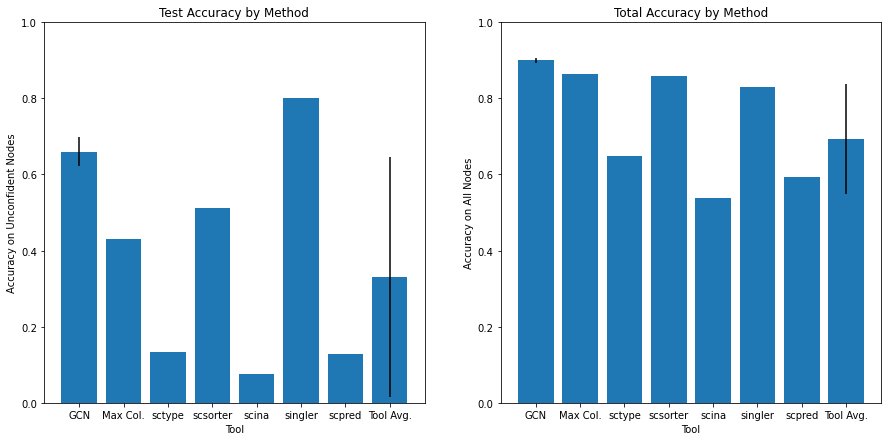

In [7]:
to_plot = results.loc[results['method']!="Confident Labels",:]
fig, ax = plt.subplots(1,2,figsize=(15, 7))
ax[0].bar(to_plot['method'],  to_plot['test_accuracy'], yerr= to_plot['test_sd'], align='center')
ax[0].set_xlabel("Tool")
ax[0].set_ylabel("Accuracy on Unconfident Nodes")
ax[0].set_title("Test Accuracy by Method")
ax[1].bar(to_plot['method'],  to_plot['total_accuracy'], yerr= to_plot['total_sd'], align='center')
ax[1].set_xlabel("Tool")
ax[1].set_ylabel("Accuracy on All Nodes")
ax[1].set_title("Total Accuracy by Method")
ax[0].set_ylim([0, 1])
ax[1].set_ylim([0, 1])

In [20]:
grid_results = pd.read_csv("grid_search_sim_0.8_output/combined.csv", header=None, index_col=0)
grid_results.columns = ["Total Accuracy", "Val Accuracy", "Test Accuracy", "Total SD", "Val SD", "Test SD", "Config", "Dropout", "Batch", "Neighbors"]
grid_results['GCN Layers'] = grid_results['Config'].apply(lambda x: x.split('_')[0])
grid_results['Final Embedding'] = grid_results['Config'].apply(lambda x: x.split('_')[1].split(".")[0])
grid_results['GCN Layers'] = pd.to_numeric(grid_results['GCN Layers'])
grid_results['Final Embedding'] = pd.to_numeric(grid_results['Final Embedding'])
grid_results.sort_values("Val Accuracy", ascending=False).head(10)

,Total Accuracy,Val Accuracy,Test Accuracy,Total SD,Val SD,Test SD,Config,Dropout,Batch,Neighbors,GCN Layers,Final Embedding
0,,,,,,,,,,,,
91,0.907615,0.960440,0.0,0.002399,0.013156,0.0,2_40.txt,0.0,20,2,2,40
1,0.907014,0.957143,0.0,0.001690,0.009267,0.0,2_25.txt,0.0,20,2,2,25
127,0.906313,0.953297,0.0,0.001437,0.007878,0.0,2_15.txt,0.0,20,2,2,15
4,0.906212,0.952747,0.0,0.001509,0.008272,0.0,2_25.txt,0.0,35,2,2,25
145,0.906012,0.951648,0.0,0.002154,0.011813,0.0,2_60.txt,0.0,20,2,2,60
94,0.905812,0.950549,0.0,0.002362,0.012951,0.0,2_40.txt,0.0,35,2,2,40
7,0.905210,0.947253,0.0,0.001353,0.007417,0.0,2_25.txt,0.0,50,2,2,25
10,0.904609,0.943956,0.0,0.002399,0.013156,0.0,2_25.txt,0.0,65,2,2,25
13,0.904509,0.943407,0.0,0.001570,0.008610,0.0,2_25.txt,0.0,80,2,2,25


In [21]:
set(range(1,217))-set(grid_results.index.to_numpy())

set()

In [10]:
data_folders = ["/home/groups/ConradLab/daniel/sharp_data/sharp_sims_test/splat_0.8_de_rq/"]
tools = ["sctype","scsorter","scina", "singler", "scpred"]
votes_necessary = .51
model_file = "configs/2_40.txt"
neighbors = 2
batch_size=20
training_epochs=150
random_inits = 5
counts="query_counts.csv"
meta="query_meta.csv"
meta_col = "Group"

In [11]:
results = test_model(data_folders, tools, votes_necessary, model_file, neighbors, batch_size, training_epochs, random_inits, counts=counts, meta=meta, meta_col=meta_col)
results

Loss in epoch 0 = 57.149944
Loss in epoch 10 = 0.045779
Loss in epoch 20 = 0.060540
Loss in epoch 30 = 0.016875
Loss in epoch 40 = 0.002146
Loss in epoch 50 = 0.001574
Loss in epoch 60 = 0.001173
Loss in epoch 70 = 0.000690
Loss in epoch 80 = 0.001570
Loss in epoch 90 = 0.000342
Loss in epoch 100 = 0.000247
Loss in epoch 110 = 0.000150
Loss in epoch 120 = 0.000144
Loss in epoch 130 = 0.000124
Loss in epoch 140 = 0.000068
Loss in epoch 0 = 59.194504
Loss in epoch 10 = 0.053449
Loss in epoch 20 = 0.012053
Loss in epoch 30 = 0.005757
Loss in epoch 40 = 0.002978
Loss in epoch 50 = 0.001558
Loss in epoch 60 = 0.001381
Loss in epoch 70 = 0.000644
Loss in epoch 80 = 0.000616
Loss in epoch 90 = 0.000307
Loss in epoch 100 = 0.000266
Loss in epoch 110 = 0.000213
Loss in epoch 120 = 0.000128
Loss in epoch 130 = 0.000104
Loss in epoch 140 = 0.000078
Loss in epoch 0 = 57.983654
Loss in epoch 10 = 0.073403
Loss in epoch 20 = 0.012046
Loss in epoch 30 = 0.004465
Loss in epoch 40 = 0.002220
Loss in ep

/home/users/lewinsda/scSHARP/utilities.py:185: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return float((torch.tensor(preds) == torch.tensor(real)).type(torch.FloatTensor).mean().numpy())


,data_name,method,total_accuracy,train_accuracy,test_accuracy,total_sd,train_sd,test_sd
0,splat_0.8_de_rq,GCN,0.960721,0.972618,0.832941,0.002172,0.000000,0.025505
1,splat_0.8_de_rq,Max Col.,0.911824,0.972618,0.258824,0.000000,0.000000,0.000000
2,splat_0.8_de_rq,Confident Labels,NaN,0.972618,NaN,0.000000,0.000000,0.000000
3,splat_0.8_de_rq,sctype,0.798597,0.845564,0.294118,0.000000,0.000000,0.000000
4,splat_0.8_de_rq,scsorter,0.886774,0.933187,0.388235,0.000000,0.000000,0.000000
5,splat_0.8_de_rq,scina,0.587174,0.639650,0.023529,0.000000,0.000000,0.000000
6,splat_0.8_de_rq,singler,0.851703,0.858708,0.776471,0.000000,0.000000,0.000000
7,splat_0.8_de_rq,scpred,0.710421,0.753560,0.247059,0.000000,0.000000,0.000000
8,splat_0.8_de_rq,Tool Avg.,0.766934,0.806134,0.345882,0.120475,0.112852,0.275480


(0.0, 1.0)

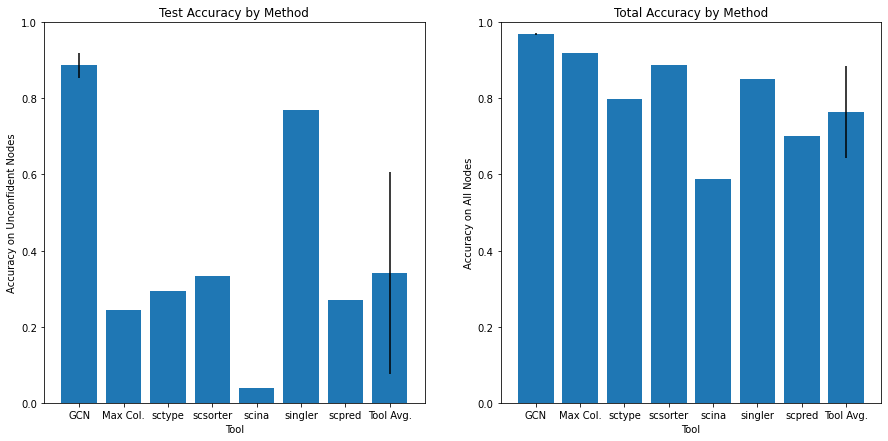

In [10]:
to_plot = results.loc[results['method']!="Confident Labels",:]
fig, ax = plt.subplots(1,2,figsize=(15, 7))
ax[0].bar(to_plot['method'],  to_plot['test_accuracy'], yerr= to_plot['test_sd'], align='center')
ax[0].set_xlabel("Tool")
ax[0].set_ylabel("Accuracy on Unconfident Nodes")
ax[0].set_title("Test Accuracy by Method")
ax[1].bar(to_plot['method'],  to_plot['total_accuracy'], yerr= to_plot['total_sd'], align='center')
ax[1].set_xlabel("Tool")
ax[1].set_ylabel("Accuracy on All Nodes")
ax[1].set_title("Total Accuracy by Method")
ax[0].set_ylim([0, 1])
ax[1].set_ylim([0, 1])

In [15]:
data_path = "/home/groups/ConradLab/daniel/sharp_data/sharp_sims_test/splat_0.8_de_rq/query_counts.csv"
tool_preds = "/home/groups/ConradLab/daniel/sharp_data/sharp_sims_test/splat_0.8_de_rq/preds.csv"
tool_list = ["scina", "scsorter", "sctype", "singler", "scsorter"]
marker_path = "/home/groups/ConradLab/daniel/sharp_data/sharp_sims_test/splat_0.8_de_rq/markers.txt"
neighbors=2
config="configs/2_15.txt"
sharp = scSHARP(data_path, tool_preds, tool_list, marker_path, neighbors, config)

In [16]:
preds, train_nodes, test_nodes, keep_cells = sharp.run_prediction(training_epochs=1, thresh=0.51, batch_size=35, seed=8)

Loss in epoch 0 = 36.323002


In [17]:
len(test_nodes)

85

In [8]:
labels = pd.read_csv("/home/groups/ConradLab/daniel/sharp_data/sharp_sims_test/splat_0.7_de_rq/query_meta.csv", index_col=0)['Group']
labels

Cell1001    Group4
Cell1002    Group3
Cell1003    Group3
Cell1004    Group3
Cell1005    Group3
             ...  
Cell1996    Group1
Cell1997    Group2
Cell1998    Group3
Cell1999    Group3
Cell2000    Group4
Name: Group, Length: 1000, dtype: object

In [9]:
umap_embedding = pd.read_csv("/home/groups/ConradLab/daniel/sharp_data/sharp_sims_test/splat_0.7_de_rq/umap_embedding.csv", index_col=0)
umap_embedding['real labels'] = labels

umap_embedding['confident labels'] = sharp.confident_labels
map_dict = {-1:"unknown", 0:"Group1", 1:"Group2", 2:"Group3", 3:"Group4"}
umap_embedding['confident labels'] = umap_embedding["confident labels"].map(map_dict)

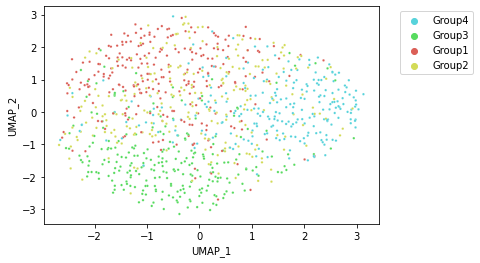

In [10]:
#pal = sns.color_palette("hls", )
sns.scatterplot(data=umap_embedding, x="UMAP_1", y="UMAP_2", hue="real labels", s=6, palette=dict(Group1='#db5f57', Group2="#d3db57", Group3 = "#57db5f", Group4='#57d3db'))
plt.legend(bbox_to_anchor=(1.05,1))

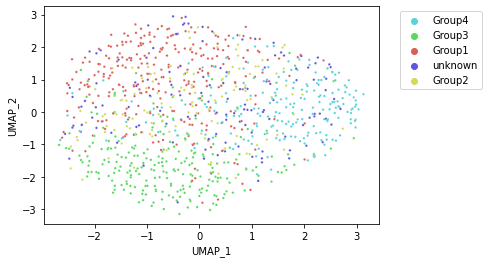

In [11]:
sns.scatterplot(data=umap_embedding, x="UMAP_1", y="UMAP_2", hue="confident labels", s=6, palette=dict(Group1='#db5f57', Group2="#d3db57", Group3 = "#57db5f", Group4='#57d3db', unknown='#5f57db'))
plt.legend(bbox_to_anchor=(1.05,1))